# <center><strong> **Car Price Prediction** </strong></center>


###### **By Mohamed Jamyl**

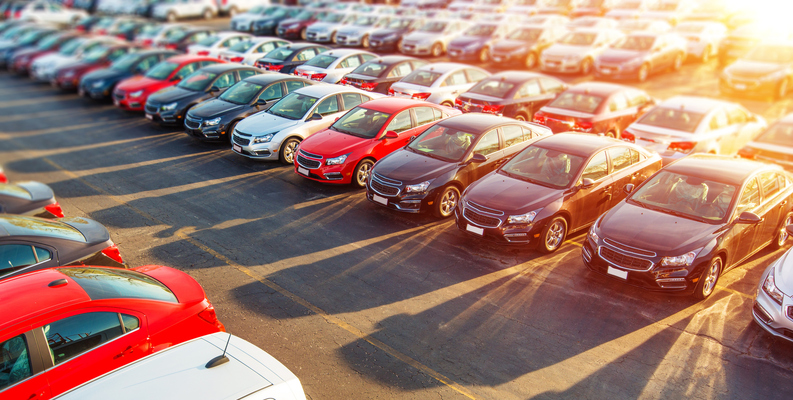

In [1]:
from IPython.display import Image
Image(filename='car.jpg')

## <center><strong> **Project Overview** </strong></center>

#### **With the rise in the variety of cars with differentiated capabilities and features such as model, production year, category, brand, fuel type, engine volume, mileage, cylinders, colour, airbags and many more, we are bringing a car price prediction challenge for all. We all aspire to own a car within budget with the best features available.**

--------------------------------------------
--------------------------------------------

## **Import Libraries**

In [2]:
from pandas import read_csv, to_numeric, DataFrame, concat
from matplotlib.pyplot import show, suptitle, subplots_adjust, tight_layout, plot, legend, subplots
from matplotlib.pyplot import figure, plot, title, xlabel, ylabel, text, grid, xticks, tight_layout, style 
from numpy import nan, log, inf
from seaborn import kdeplot, heatmap, pairplot, boxplot
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
from pickle import dump


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## **Exploratory Data Analysis (EDA)**
### **1. Initial Data Understanding**
- ##### **Data loading and Inspection**
- ##### **Data Types**
- ##### **Missing Values**
- ##### **Duplicates**

In [3]:
df = read_csv('car_price.csv')

In [4]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,Silver,4


In [5]:
df.sample(10)

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
16047,45802487,17634,531,HYUNDAI,I30,2012,Hatchback,Yes,Diesel,1.6,183380 km,4,Automatic,Front,4-May,Left wheel,Grey,4
13087,45816076,1176,586,HYUNDAI,Elantra,2012,Sedan,Yes,Petrol,1.8,264398 km,4,Automatic,Front,4-May,Left wheel,Blue,12
2112,45752505,15681,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,128000 km,4,Automatic,Front,4-May,Left wheel,White,4
2060,45772844,706,645,LEXUS,CT 200h,2011,Hatchback,Yes,Hybrid,1.8,116869 km,4,Automatic,Front,4-May,Left wheel,Black,0
16350,45802475,17346,531,HYUNDAI,I30,2012,Hatchback,Yes,Diesel,1.6,151136 km,4,Automatic,Front,4-May,Left wheel,White,4
14809,45732158,26343,640,HYUNDAI,Santa FE,2013,Jeep,Yes,Diesel,2,36458 km,4,Automatic,Front,4-May,Left wheel,White,4
14461,45772091,16308,-,MERCEDES-BENZ,E 350,2005,Sedan,Yes,Petrol,3.5 Turbo,111520 km,6,Automatic,Rear,4-May,Left wheel,Grey,0
2288,45770166,470,2225,LEXUS,GX 460,2017,Jeep,Yes,Petrol,4.6,69918 km,8,Automatic,4x4,4-May,Left wheel,White,0
4294,45815839,62408,-,MERCEDES-BENZ,CLS 550,2012,Sedan,Yes,Petrol,4.7 Turbo,134000 km,8,Tiptronic,Rear,4-May,Left wheel,Black,8
1537,45809908,58172,784,HONDA,Civic,2017,Hatchback,Yes,Petrol,1.5,26166 km,4,Automatic,Front,4-May,Left wheel,Black,4


In [6]:
df.tail()

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4,Manual,Rear,2-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4,Tiptronic,Front,4-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4,Automatic,Front,4-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4,Automatic,Front,4-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4,Automatic,Front,4-May,Left wheel,White,12


In [7]:
df.shape

(19237, 18)

In [8]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod_year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [9]:
df = df.rename(columns={'Engine volume':'Engine_volume',
                        'Fuel type':'Fuel_type',
                        'Leather interior':'Leather_interior',
                        'Gear box type':'Gear_box_type',
                        'Drive wheels':'Drive_wheels'})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                19237 non-null  int64 
 1   Price             19237 non-null  int64 
 2   Levy              19237 non-null  object
 3   Manufacturer      19237 non-null  object
 4   Model             19237 non-null  object
 5   Prod_year         19237 non-null  int64 
 6   Category          19237 non-null  object
 7   Leather_interior  19237 non-null  object
 8   Fuel_type         19237 non-null  object
 9   Engine_volume     19237 non-null  object
 10  Mileage           19237 non-null  object
 11  Cylinders         19237 non-null  int64 
 12  Gear_box_type     19237 non-null  object
 13  Drive_wheels      19237 non-null  object
 14  Doors             19237 non-null  object
 15  Wheel             19237 non-null  object
 16  Color             19237 non-null  object
 17  Airbags     

In [11]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod_year           0
Category            0
Leather_interior    0
Fuel_type           0
Engine_volume       0
Mileage             0
Cylinders           0
Gear_box_type       0
Drive_wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [12]:
df.duplicated().sum()

313

### **2. Basic Statistical Overview**

- ##### Summary Statistical : **describe()**

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod_year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


In [14]:
df.select_dtypes(include='object').describe()

,Levy,Manufacturer,Model,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Gear_box_type,Drive_wheels,Doors,Wheel,Color
count,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,4-May,Left wheel,Black
freq,5819,3769,1083,8736,13954,10150,3916,721,13514,12874,18332,17753,5033


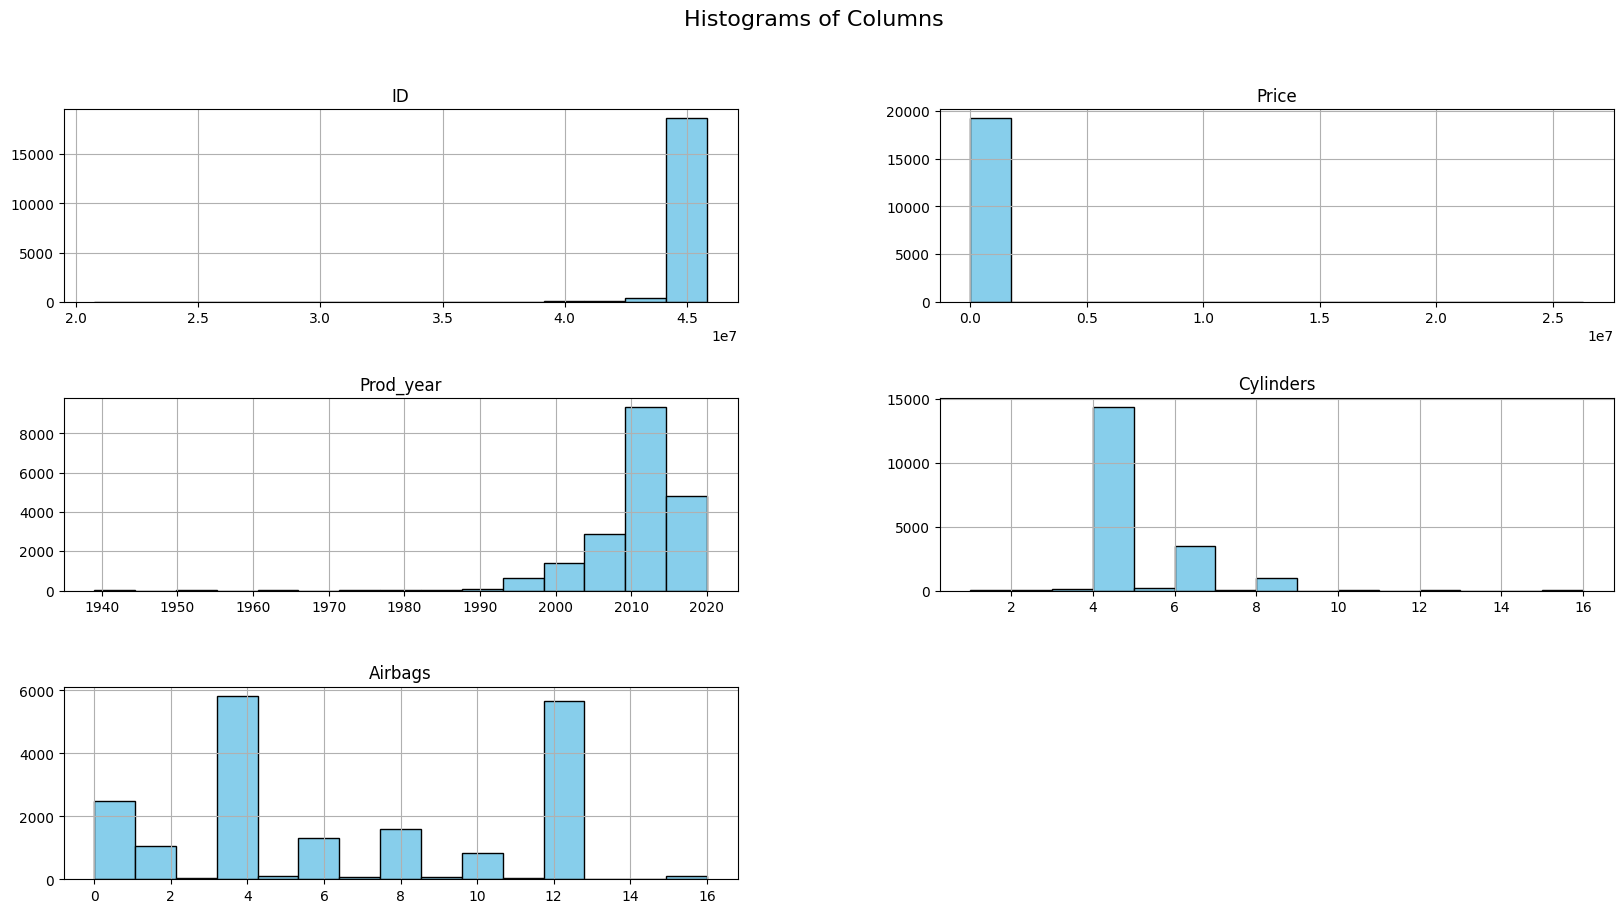

In [15]:
df.hist(bins=15, figsize=(20, 10), color='skyblue', edgecolor='black')
suptitle('Histograms of Columns', fontsize=16)
subplots_adjust(hspace=0.5)  
show()

- ##### Summary Statistical : **Value_counts()**

In [16]:
df['Manufacturer'].value_counts()

Manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, Length: 65, dtype: int64

In [17]:
# Extract top 10
top10=df['Manufacturer'].value_counts().sort_values(ascending=False)[:10]
top10

Manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
BMW              1049
LEXUS             982
HONDA             977
NISSAN            660
VOLKSWAGEN        579
Name: count, dtype: int64

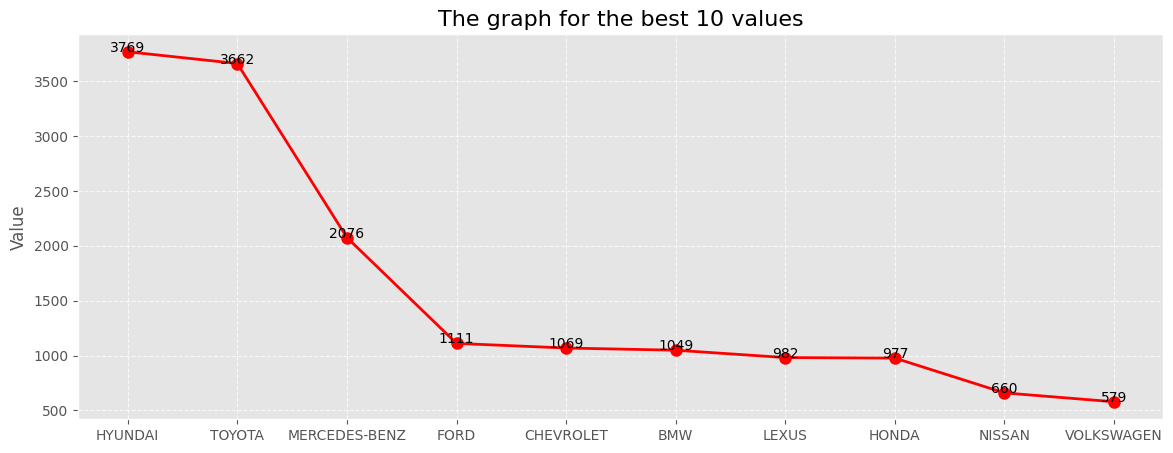

In [18]:
style.use('ggplot')
figure(figsize=(14, 5))

plot(top10, marker='o', color='red', linestyle='-', linewidth=2, markersize=8)
title('The graph for the best 10 values', fontsize=16)
ylabel('Value', fontsize=12)

for i, value in enumerate(top10):
    text(i, value + 0.5, str(value), ha='center', fontsize=10, color='black')

grid(True, linestyle='--', alpha=0.7)

show()

#### This is a line plot displaying the "Value" of the top 10 items, with the specific items labeled on the x-axis. The title "The graph for the best 10 values" suggests these are the 10 items with the highest values according to some metric.

- ##### **Top Item**: HYUNDAI has the highest value, approximately 3769.
- ##### **Significant Initial Drop**: There's a notable decrease in value from HYUNDAI to TOYOTA (around 3662) and then a much larger drop to MERCEDES-BENZ (around 2076).
- ##### **Continued Decline**: The value continues to decrease as we move along the x-axis, although the rate of decrease becomes less steep after MERCEDES-BENZ.
- ##### **Relatively Stable Mid-Range**: From FORD (around 1111) to LEXUS (around 982), the values are relatively stable, fluctuating within a few hundred units.
- ##### **Sharp Decline at the End**: There's another sharp decline in value from HONDA (around 977) to NISSAN (around 660) and then a further decrease to VOLKSWAGEN (around 570), which has the lowest value among the top 10.
- ##### Specific Values: The exact value for each of the top 10 items is labeled directly above each data point, allowing for precise comparison.

In [19]:
top10MeanPrices=[df[df['Manufacturer']==i]['Price'].mean() for i in list(top10.index)]
top10MeanPrices

[22338.447864154947,
 14248.982250136538,
 18609.38294797688,
 15573.98199819982,
 14926.368568755846,
 20876.79218303146,
 19191.27698574338,
 14291.335721596724,
 10032.327272727272,
 11640.421416234887]

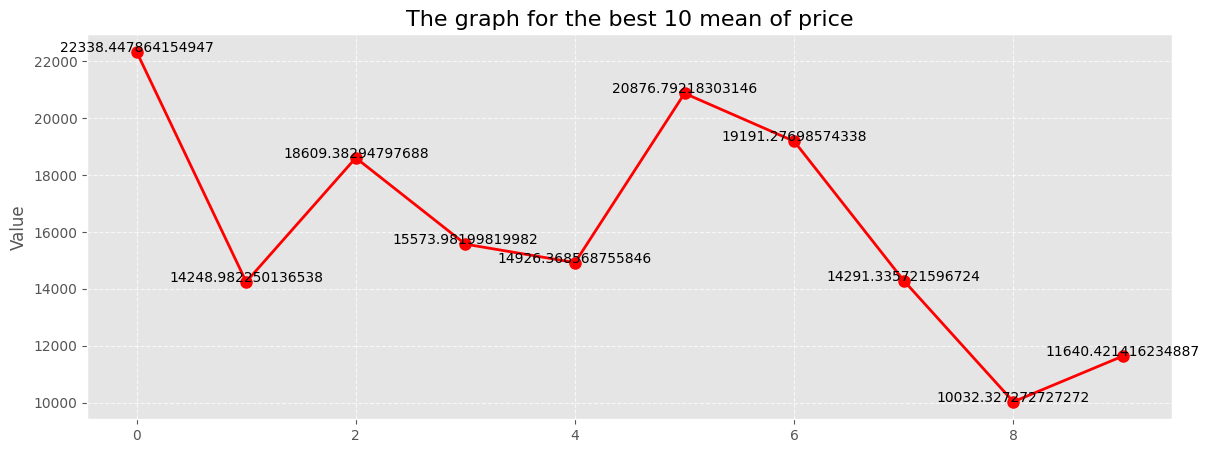

In [20]:
style.use('ggplot')
figure(figsize=(14, 5))

plot(top10MeanPrices, marker='o', color='red', linestyle='-', linewidth=2, markersize=8)
title('The graph for the best 10 mean of price', fontsize=16)
ylabel('Value', fontsize=12)

for i, value in enumerate(top10MeanPrices):
    text(i, value + 0.5, str(value), ha='center', fontsize=10, color='black')

grid(True, linestyle='--', alpha=0.7)

show()

- ##### The item at index 0 has the highest mean of price (approximately 22338).

- ##### The mean of price drops sharply from index 0 to index 1 (approximately 14248).

- ##### The mean of price fluctuate somewhat between indices 1 and 7.

- ##### The item at index 8 has the lowest mean of price among the top 10 (approximately 10032)

---------------------------------

In [21]:
# object_data = df.select_dtypes(include='object')
# for col in object_data:
#     style.use('ggplot')
#     figure(figsize=(15,5))
#     Top10=df[col].value_counts()[:10]
#     colors=['blue','red','green','orange']
#     Top10.plot(kind='bar',color=colors)
#     xticks(rotation='horizontal' )
#     title('Top10'+' '+col)
#     show()

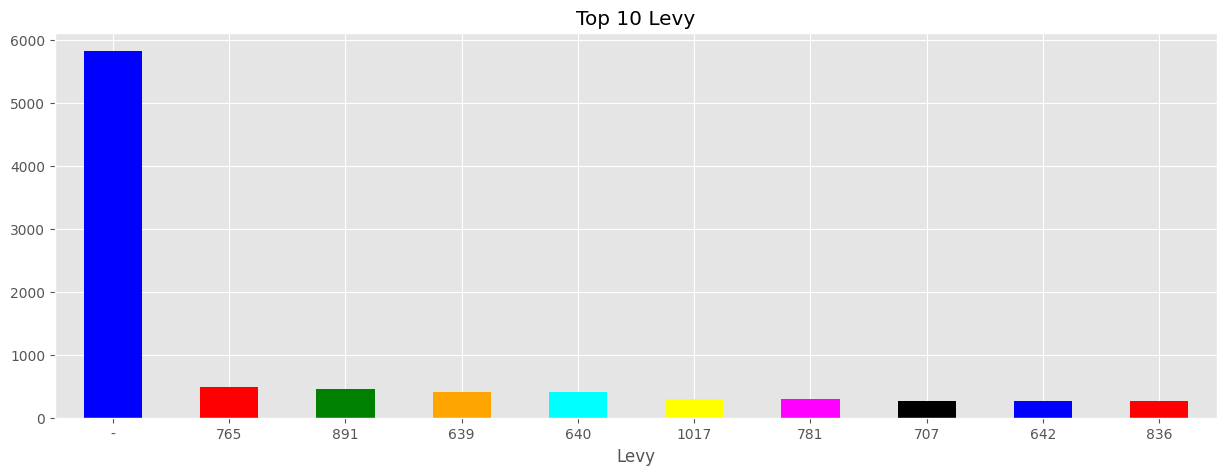

In [22]:
style.use('ggplot')
figure(figsize=(15,5))
Top10=df['Levy'].value_counts()[:10]
colors=['blue','red','green','orange','cyan','yellow','magenta','black']
Top10.plot(kind='bar', color=colors)
xticks(rotation='horizontal' )
title('Top 10 Levy')
show()

- ##### The first Levy (represented by the first bar, and labeled "-") has a significantly higher value (approximately 5800) compared to all other Levy values.

- ##### The remaining Levy values are considerably lower, all falling below 1000.

- ##### The Levy with the second-highest value is "1017".

- ##### The bars for "765", "891", "781", and "836" have relatively similar values.

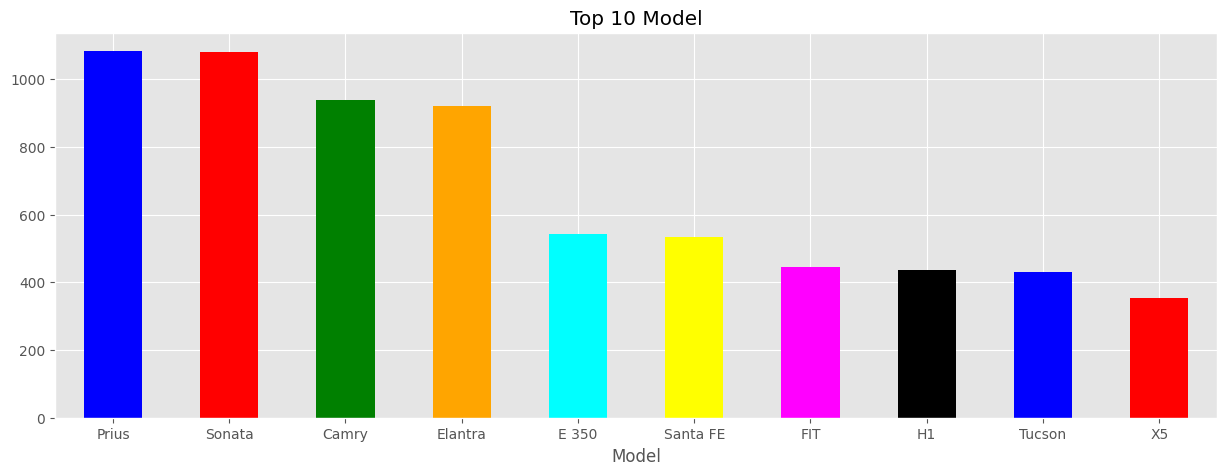

In [23]:
style.use('ggplot')
figure(figsize=(15,5))
Top10=df['Model'].value_counts()[:10]
colors=['blue','red','green','orange','cyan','yellow','magenta','black']
Top10.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
title('Top 10 Model')
show()

- ##### Prius has the highest value among the models shown.

- ##### Sonata has a value very close to that of Prius.

- ##### Camry and Elantra have similar, moderately high values.

- ##### The value drops noticeably for E 350 and Santa FE.

- ##### FIT, H1, and Tucson have similar, relatively low values.

- ##### X5 has the lowest value in the top 10.

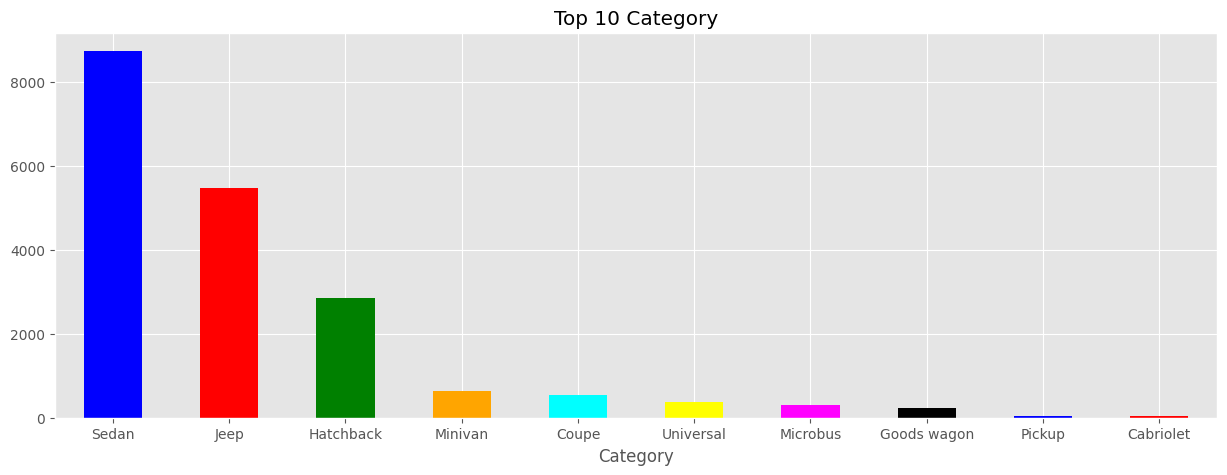

In [24]:
style.use('ggplot')
figure(figsize=(15,5))
Top10=df['Category'].value_counts()[:10]
colors=['blue','red','green','orange','cyan','yellow','magenta','black']
Top10.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
title('Top 10 Category')
show()

- ##### Sedan has the highest value among the categories shown.

- ##### Jeep has the second-highest value, but it's significantly lower than Sedan.

- ##### Hatchback has the third-highest value, lower than Jeep.

- ##### Minivan has a noticeably lower value compared to Hatchback.

- ##### Coupe, Universal, Microbus, Goods wagon, Pickup, and Cabriolet all have relatively low values, with Cabriolet having the lowest value among the top 10.

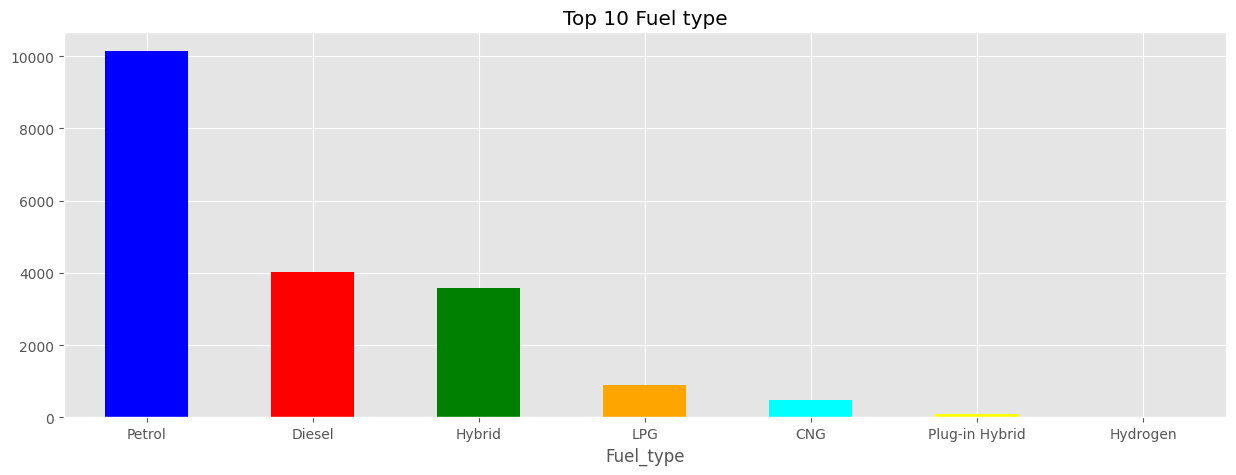

In [25]:
style.use('ggplot')
figure(figsize=(15,5))
Top10=df['Fuel_type'].value_counts()[:10]
colors=['blue','red','green','orange','cyan','yellow','magenta']
Top10.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
title('Top 10 Fuel type')
show()

- ##### Petrol has the highest value, significantly higher than all other fuel types.

- ##### Diesel has the second-highest value, followed by Hybrid.

- ##### The values for LPG and CNG are considerably lower than Petrol, Diesel and Hybrid.

- ##### Plug-in Hybrid and Hydrogen have the lowest values among the top 10.

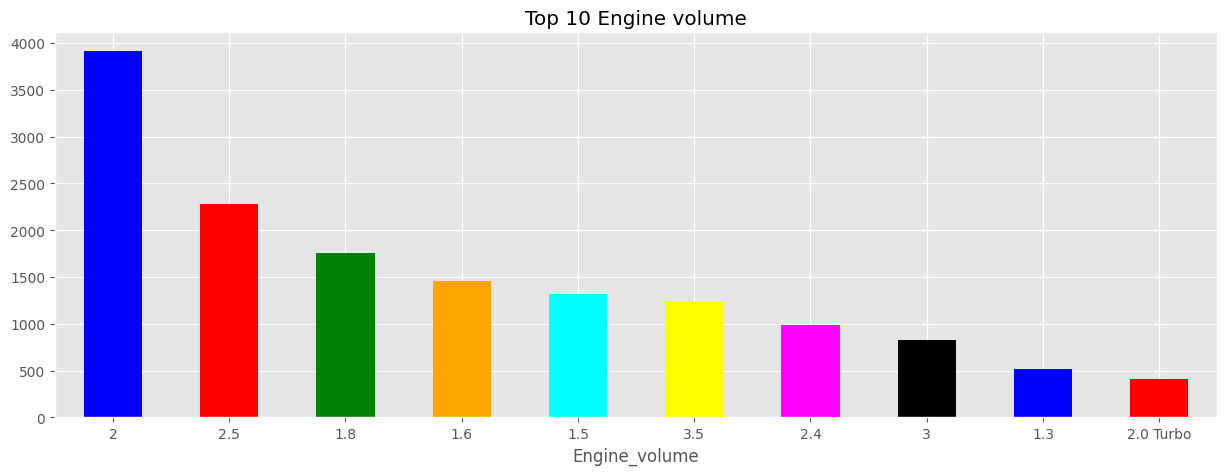

In [26]:
style.use('ggplot')
figure(figsize=(15,5))
Top10=df['Engine_volume'].value_counts()[:10]
colors=['blue','red','green','orange','cyan','yellow','magenta','black']
Top10.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
title('Top 10 Engine volume')
show()

- ##### The engine volume 2 has the highest value, significantly higher than all other engine volumes.

- ##### The engine volume 2.5 has the second-highest value.

- ##### The engine volumes 1.8 and 1.6 have similar values, which are lower than 2.5.

- ##### The remaining engine volumes (1.5, 3.5, 2.4, 3, 1.3, and 2.0 Turbo) have progressively lower values.

- ##### The engine volume 2.0 Turbo has the lowest value among the top 10.

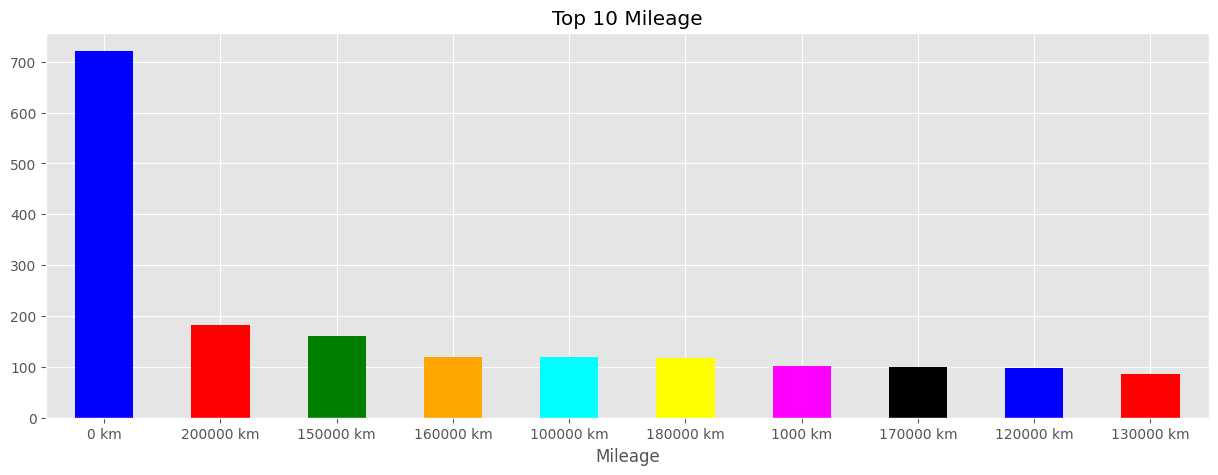

In [27]:
style.use('ggplot')
figure(figsize=(15,5))
Top10=df['Mileage'].value_counts()[:10]
colors=['blue','red','green','orange','cyan','yellow','magenta','black']
Top10.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
title('Top 10 Mileage')
show()

- ##### The mileage 0 km has the highest value, significantly higher than all other mileage values.

- ##### The mileage 200000 km has the second-highest value.

- ##### The mileage values from 150000 km to 1000 km have progressively lower values.

- ##### The mileage 1000 km has a very low value, close to the lowest.

- ##### The mileage values 170000 km, 120000 km, and 130000 km have the lowest values among the top 10.

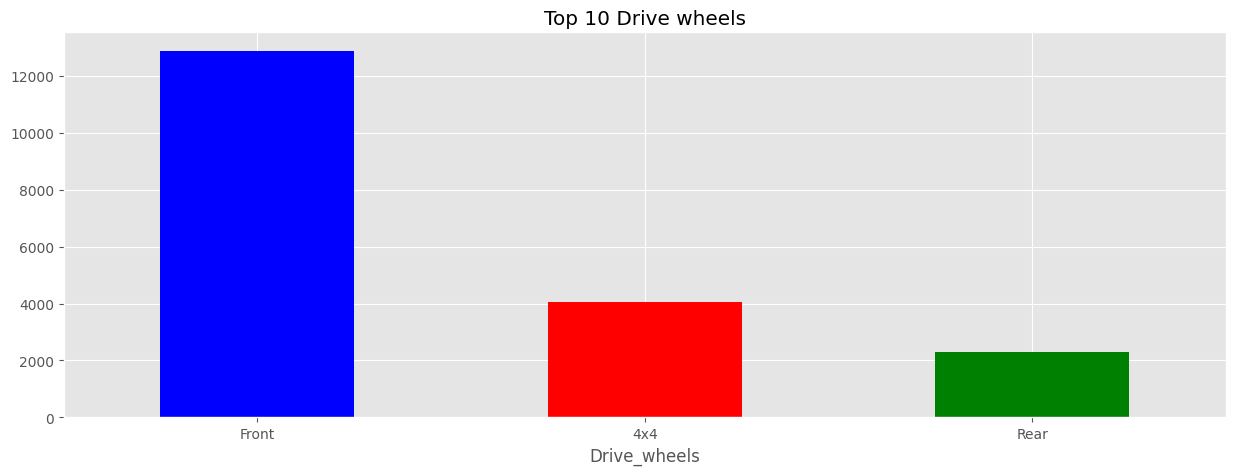

In [28]:
style.use('ggplot')
figure(figsize=(15,5))
Top10=df['Drive_wheels'].value_counts()[:10]
colors=['blue','red','green']
Top10.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
title('Top 10 Drive wheels')
show()

- ##### Front-wheel drive (Front) has the highest value, significantly higher than the other two configurations.

- ##### 4x4 has the second-highest value.

- ##### Rear-wheel drive (Rear) has the lowest value among the three.

------------------------------
------------------------------

## **Data Cleaning**

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df.shape

(18924, 18)

-------------------------------

In [31]:
df['Levy'].unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

In [32]:
len([i for i in df['Levy'].tolist() if not i.isnumeric()])

5709

In [33]:
# replace (-) by (0) in Levy column
df['Levy'].replace({'-':0},inplace=True)
df['Levy']=df['Levy'].astype(float)

C:\Users\RPC\AppData\Local\Temp\ipykernel_12912\272051335.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Levy'].replace({'-':0},inplace=True)


In [34]:
df['Levy'].unique()

array([ 1399.,  1018.,     0.,   862.,   446.,   891.,   761.,   751.,
         394.,  1053.,  1055.,  1079.,   810.,  2386.,  1850.,   531.,
         586.,  1249.,  2455.,   583.,  1537.,  1288.,   915.,  1750.,
         707.,  1077.,  1486.,  1091.,   650.,   382.,  1436.,  1194.,
         503.,  1017.,  1104.,   639.,   629.,   919.,   781.,   530.,
         640.,   765.,   777.,   779.,   934.,   769.,   645.,  1185.,
        1324.,   830.,  1187.,  1111.,   760.,   642.,  1604.,  1095.,
         966.,   473.,  1138.,  1811.,   988.,   917.,  1156.,   687.,
       11714.,   836.,  1347.,  2866.,  1646.,   259.,   609.,   697.,
         585.,   475.,   690.,   308.,  1823.,  1361.,  1273.,   924.,
         584.,  2078.,   831.,  1172.,   893.,  1872.,  1885.,  1266.,
         447.,  2148.,  1730.,   730.,   289.,   502.,   333.,  1325.,
         247.,   879.,  1342.,  1327.,  1598.,  1514.,  1058.,   738.,
        1935.,   481.,  1522.,  1282.,   456.,   880.,   900.,   798.,
      

In [35]:
df['Levy'].mean()

632.8864933417882

In [36]:
df['Levy'].replace({0:nan},inplace=True)

m=df['Levy'].mean()
df['Levy'].fillna(m,inplace=True)

C:\Users\RPC\AppData\Local\Temp\ipykernel_12912\1111466452.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Levy'].replace({0:nan},inplace=True)
C:\Users\RPC\AppData\Local\Temp\ipykernel_12912\1111466452.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [37]:
df['Levy'].value_counts()

Levy
906.299205     5709
765.000000      482
891.000000      453
639.000000      403
640.000000      398
               ... 
3156.000000       1
2908.000000       1
1279.000000       1
1719.000000       1
1901.000000       1
Name: count, Length: 559, dtype: int64

--------------------------------

In [38]:
df['Engine_volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [39]:
len([i for i in df['Engine_volume'].tolist() if 'Turbo' in i])

1892

In [40]:
# replace (Turbo) by ('') in Engine volume column
df['Engine_volume']=df['Engine_volume'].str.replace('Turbo','')
df['Engine_volume'] = to_numeric(df['Engine_volume'])

In [41]:
df['Engine_volume'].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

--------------------------

In [42]:
df['Mileage'].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

In [43]:
len([i for i in df['Mileage'].tolist() if 'km' in i])

18924

In [44]:
# replace (km) by ('') in Mileage column
df['Mileage']=df['Mileage'].str.replace('km','')
df['Mileage']=to_numeric(df['Mileage'])

In [45]:
df['Mileage'].unique()

array([186005, 192000, 200000, ..., 140607, 307325, 186923], dtype=int64)

------------------------------------

In [46]:
df=df.drop(['ID','Doors'],axis=1)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod_year         18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather_interior  18924 non-null  object 
 7   Fuel_type         18924 non-null  object 
 8   Engine_volume     18924 non-null  float64
 9   Mileage           18924 non-null  int64  
 10  Cylinders         18924 non-null  int64  
 11  Gear_box_type     18924 non-null  object 
 12  Drive_wheels      18924 non-null  object 
 13  Wheel             18924 non-null  object 
 14  Color             18924 non-null  object 
 15  Airbags           18924 non-null  int64  
dtypes: float64(2), int64(5), object(9)
memory usa

In [48]:
df['Cylinders'].sort_values(ascending=False) #87  11714

12550    16
16487    16
456      16
1917     16
6863     16
         ..
13850     1
4599      1
8181      1
9980      1
13104     1
Name: Cylinders, Length: 18924, dtype: int64

------------------------------
------------------------------

## **Distribution of Variables**

- #### **Numerical Features (KDE)**

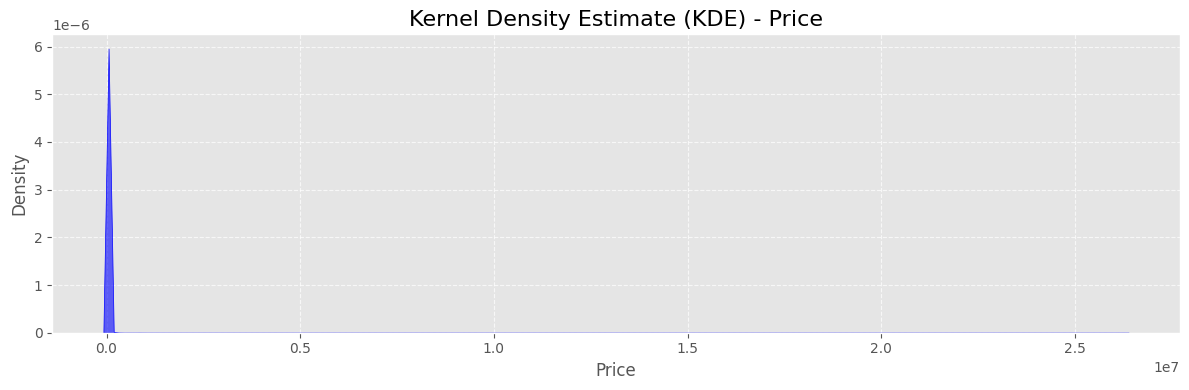

In [49]:
figure(figsize=(12, 4))  
kdeplot(df['Price'], fill=True, color='blue', alpha=0.6)  
title(f'Kernel Density Estimate (KDE) - Price', fontsize=16)  
xlabel('Price', fontsize=12)  
ylabel('Density', fontsize=12)
grid(True, linestyle='--', alpha=0.7)  
tight_layout()  
show()

#### **Concentration of Data**

- ##### **High Density Near Zero**: The tall peak at the beginning of the x-axis indicates that a large proportion of the prices are very close to zero.

- ##### **Very Few High-Priced Items**: The long tail extending to the right shows that there are a few items with very high prices, but they are relatively rare. The density (the curve's height) is very low across this wide range of higher prices.

#### **Interpretation**

##### **In simpler terms, this plot suggests that**:

- ##### Most of the items have very low prices.

- ##### There are fewer and fewer items as the price increases.

- ##### There are only a very small number of items with extremely high prices.

#### This type of distribution is common in many real-world scenarios, such as housing prices, income distributions, or the value of used goods, where most items are inexpensive, and only a few are very expensive.

--------------------------

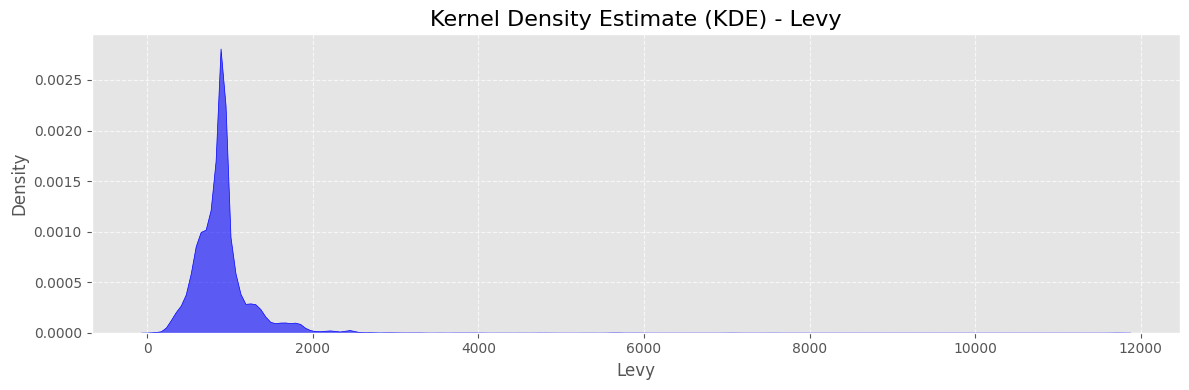

In [50]:
figure(figsize=(12, 4))  
kdeplot(df['Levy'], fill=True, color='blue', alpha=0.6)  
title(f'Kernel Density Estimate (KDE) - Levy', fontsize=16)  
xlabel('Levy', fontsize=12)  
ylabel('Density', fontsize=12) 
grid(True, linestyle='--', alpha=0.7)  
tight_layout()  
show()

#### **Concentration of Data**

- ##### **High Density Near Zero**: The tall peak at the beginning of the x-axis indicates that a large proportion of the Levy values are very close to zero.

- ##### **Very Few High Levy Values**: The long tail extending to the right shows that there are a few items with very high Levy values, but they are relatively rare. The density (the curve's height) is very low across this wide range of higher Levy values.

#### **Interpretation**

##### **In simpler terms, this plot suggests that**:

- ##### Most of the items have very low Levy values.

- ##### There are fewer and fewer items as the Levy value increases.

- ##### There are only a very small number of items with extremely high Levy values.

----------------------------

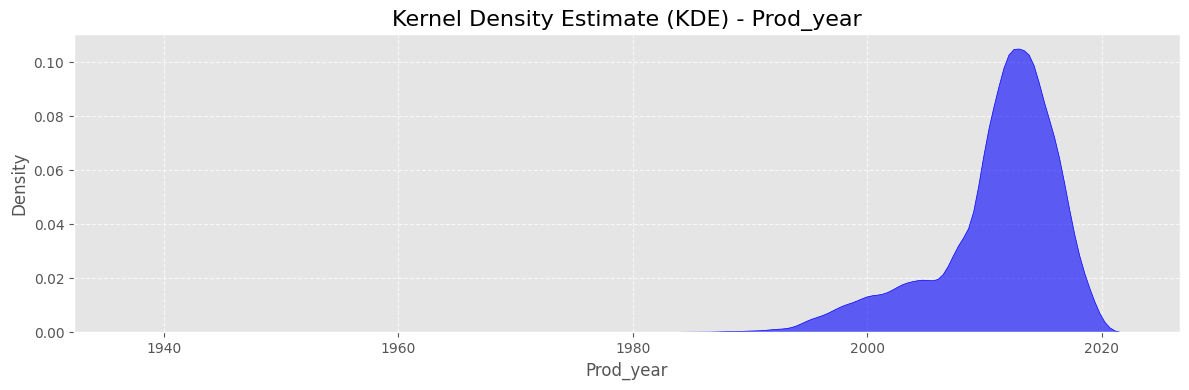

In [51]:
figure(figsize=(12, 4))  
kdeplot(df['Prod_year'], fill=True, color='blue', alpha=0.6)  
title(f'Kernel Density Estimate (KDE) - Prod_year', fontsize=16)  
xlabel('Prod_year', fontsize=12)  
ylabel('Density', fontsize=12) 
grid(True, linestyle='--', alpha=0.7)  
tight_layout()  
show()

#### **Concentration of Data**

- ##### **High Density in Recent Years**: The tall peak around 2010 indicates that a large proportion of the data points represent cars produced in that period. There's a general increase in density from the 1980s onwards, showing a growing number of cars produced in each subsequent year leading up to the peak.

- ##### **Very Few Cars from Distant Past**: The long tail extending to the left shows that there are very few cars from much earlier production years (e.g., before 1980). The density is very low across this wide range of earlier years.

#### **Interpretation**

##### **In simpler terms, this plot suggests that**:

- ##### Most of the cars in the dataset were produced in recent years, with a large concentration around the 2010s.

- ##### The number of cars decreases significantly as we go further back in production year.

- ##### There are very few cars from the distant past within this dataset.

#### This type of distribution is common in car sales or inventory data, where there are typically more newer models than older ones

--------------------------------

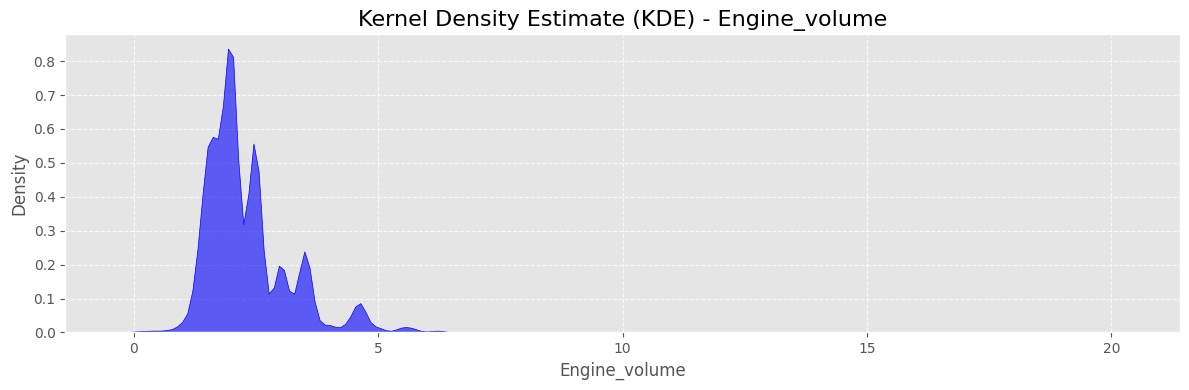

In [52]:
figure(figsize=(12, 4))  
kdeplot(df['Engine_volume'], fill=True, color='blue', alpha=0.6)  
title(f'Kernel Density Estimate (KDE) - Engine_volume', fontsize=16)  
xlabel('Engine_volume', fontsize=12)  
ylabel('Density', fontsize=12) 
grid(True, linestyle='--', alpha=0.7)  
tight_layout()  
show()

#### **Concentration of Data**

- ##### **High Density Near 0 and 2**: The tall peaks at the beginning of the x-axis indicates that a large proportion of the Engine_volumes are very close to 0 and 2.

- ##### **Lower Density for Higher Values**: The density drops off considerably after 2, indicating that larger engine volumes are less common.

#### **Interpretation**

##### **In simpler terms, this plot suggests that**:

- ##### Many items have an engine volume of 0.

- ##### Engine volumes of around 2 are also very common.

- ##### Engine volumes between 0 and 2 are uncommon.

- ##### Larger engine volumes are less and less frequent.

---------------------------------

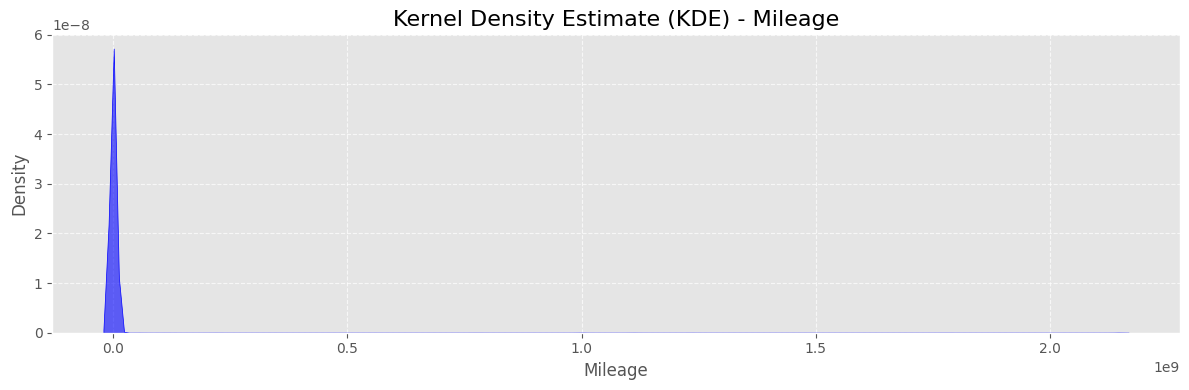

In [53]:
figure(figsize=(12, 4))  
kdeplot(df['Mileage'], fill=True, color='blue', alpha=0.6)  
title(f'Kernel Density Estimate (KDE) - Mileage', fontsize=16)  
xlabel('Mileage', fontsize=12)  
ylabel('Density', fontsize=12) 
grid(True, linestyle='--', alpha=0.7)  
tight_layout()  
show()

#### **Concentration of Data**

- ##### **High Density Near Zero**: The tall peak at the beginning of the x-axis indicates that a large proportion of the Mileage values are very close to zero.

- ##### **Very Few High Mileage Values**: The long tail extending to the right shows that there are a few items with very high Mileage values, but they are relatively rare. The density (the curve's height) is very low across this wide range of higher Mileage values.

#### **Interpretation**

##### **In simpler terms, this plot suggests that**:

- ##### Most of the items have very low Mileage values.

- ##### There are fewer and fewer items as the Mileage value increases.

- ##### There are only a very small number of items with extremely high Mileage values.

---------------------------

### **Log transformation**


C:\Users\RPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


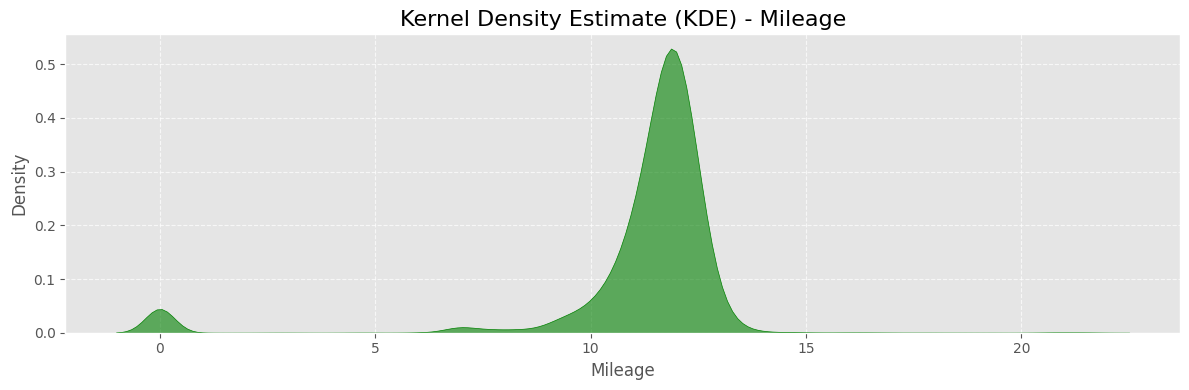

In [54]:
# log transformation
figure(figsize=(12, 4))  
kdeplot(log(df['Mileage']).replace(-inf,1e-6), fill=True, color='green', alpha=0.6)  
title(f'Kernel Density Estimate (KDE) - Mileage', fontsize=16)  
xlabel('Mileage', fontsize=12)  
ylabel('Density', fontsize=12) 
grid(True, linestyle='--', alpha=0.7)  
tight_layout()  
show()

#### **Comparison with Original KDE Plot of Mileage**

- ##### **Skewness**: The original KDE plot was extremely skewed to the right, with a very high peak near zero and a long tail. The log transformation has significantly reduced this skewness.

- ##### **Concentration**: In the original plot, most of the data was concentrated at very low mileage values.  After the transformation, the data is more evenly distributed.

#### **Interpretation**:

- ##### **Original Mileage KDE**: Indicated that most items had very low mileage, with very few having high mileage.

- ##### **Log-Transformed Mileage KDE**: Shows a more "normal" distribution, making it easier to analyze the typical range of mileage (in log terms) and how mileage values are distributed.

-----------------------------

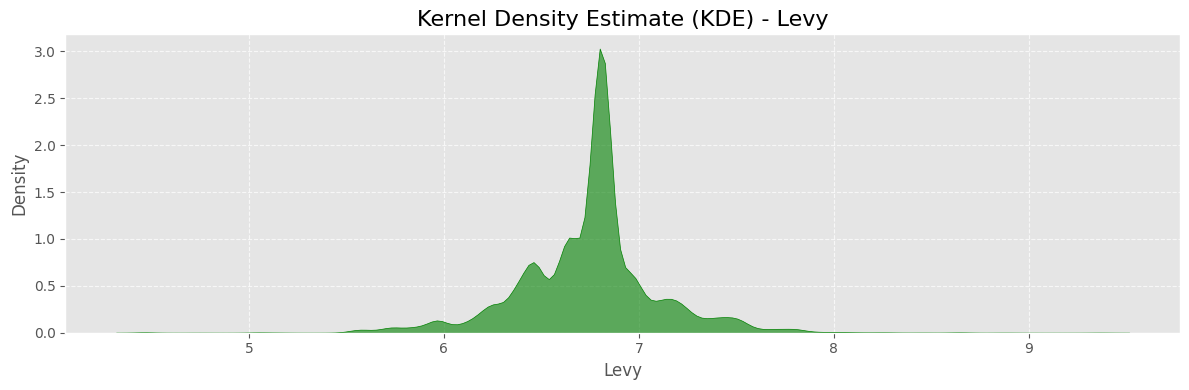

In [55]:
# log transformation

figure(figsize=(12, 4))  
kdeplot(log(df['Levy']).replace(inf,1e-6), fill=True, color='green', alpha=0.6)  
title(f'Kernel Density Estimate (KDE) - Levy', fontsize=16)  
xlabel('Levy', fontsize=12)  
ylabel('Density', fontsize=12) 
grid(True, linestyle='--', alpha=0.7)  
tight_layout()  
show()

#### **Comparison with Original KDE Plot of Levy**

- ##### **Skewness**: The original KDE plot was extremely skewed to the right, with a very high peak near zero and a long tail. The log transformation has significantly reduced this skewness.

- ##### **Concentration**: In the original plot, most of the data was concentrated at very low Levy values. After the transformation, the data is more evenly distributed.

#### **Interpretation:**

- ##### **Original Levy KDE**: Indicated that most items had very low Levy values, with very few having high Levy values.

- ##### **Log-Transformed Levy KDE**: Shows a more "normal" distribution, making it easier to analyze the typical range of Levy values (in log terms) and how Levy values are distributed.

----------------------------------

C:\Users\RPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


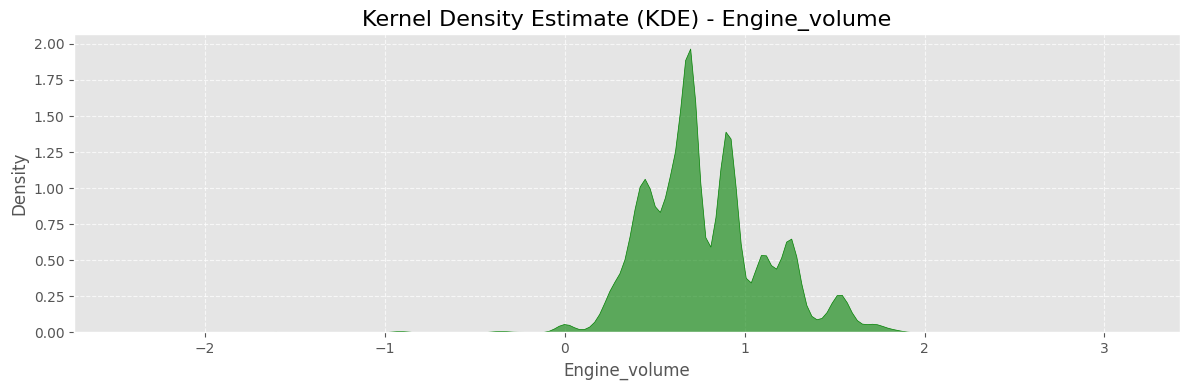

In [56]:
# log transformation

figure(figsize=(12, 4))  
kdeplot(log(df['Engine_volume']).replace(-inf,1e-6), fill=True, color='green', alpha=0.6)  
title(f'Kernel Density Estimate (KDE) - Engine_volume', fontsize=16)  
xlabel('Engine_volume', fontsize=12)  
ylabel('Density', fontsize=12) 
grid(True, linestyle='--', alpha=0.7)  
tight_layout()  
show()

#### **Comparison with Original KDE Plot of Engine_volume**

- ##### **Skewness**: The original KDE plot was heavily skewed to the right, with a very high peak at 0. The log transformation has reduced this skewness.

- ##### **Concentration**: In the original plot, a large portion of the data was concentrated at very low Engine_volume values. After the transformation, the data is more evenly distributed.

#### **Interpretation:**

- ##### **Original Engine_volume KDE**: Indicated that many items had an engine volume of 0, and that larger engine volumes were less and less frequent.

- ##### **Log-Transformed Engine_volume KDE**: Shows the distribution of the logarithm of engine volume, which may be more useful for certain types of analysis.

------------------------------
------------------------------

### **Correlation**

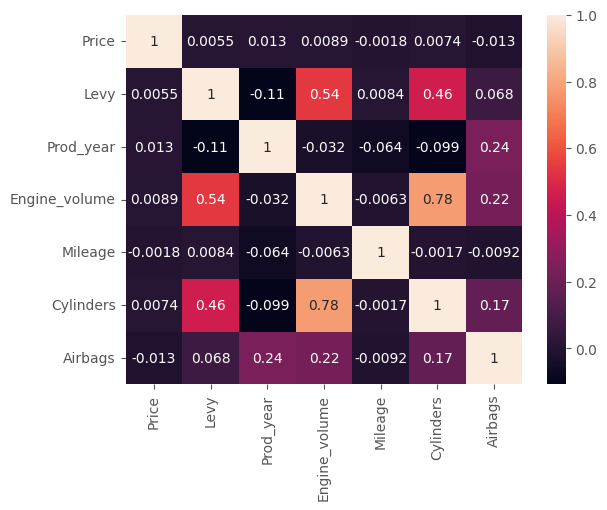

In [57]:
heatmap(df.select_dtypes(exclude='object').corr(),annot=True)
show()

#### **Key Relationships from the Correlation Matrix**

- ##### **Engine_volume** has moderate positive correlations with **Levy** (0.54) and **Cylinders** (0.78). This suggests that larger engine volumes tend to be associated with higher Levy values and more cylinders.
- ##### **Cylinders** and **Levy** also have a moderate positive correlation (0.46).
- ##### **Prod_year** has a small positive correlation with **Airbags** (0.24), indicating a slight tendency for newer cars to have more airbags.
- ##### **Price**, **Mileage**, and **Airbags** show very weak correlations with other variables.

#### **Overall**

- ##### The KDE plots highlight the distributions of individual variables, showing that Price, Levy, and Mileage are heavily skewed, while Engine_volume has multiple peaks. Log transformation helps to make these distributions more normal.
- ##### The correlation matrix shows some relationships between the variables, but most are weak. Engine_volume and Cylinders have the strongest relationships with other variables.

----------------------------

### **Feature Interactions**

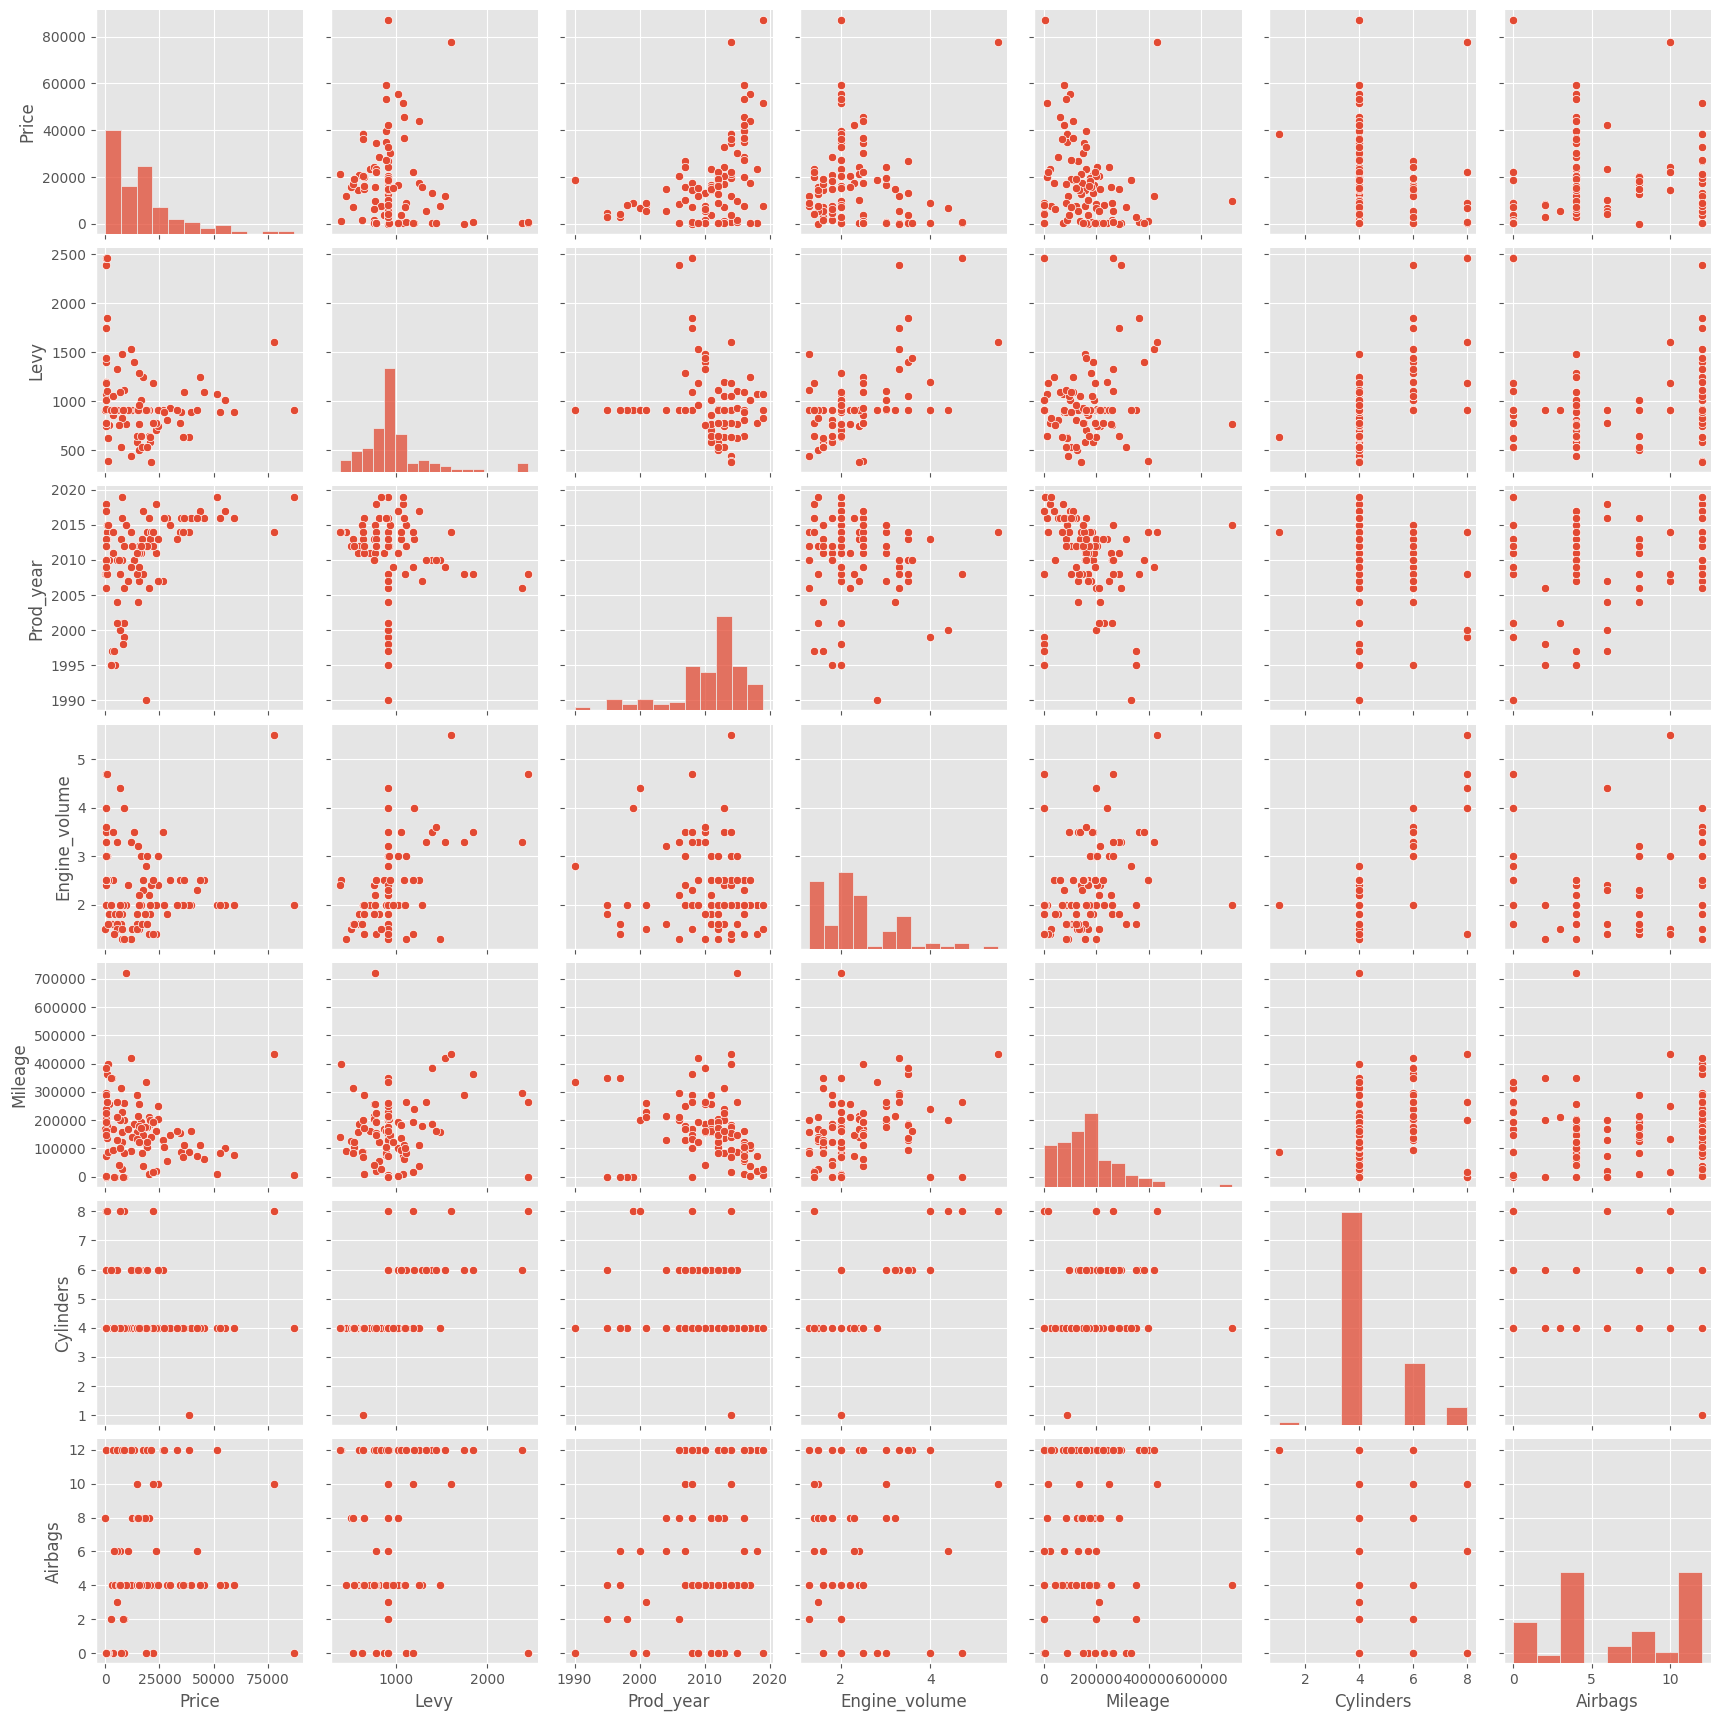

In [58]:
pairplot(df[:100])
show()

#### **Rows and Columns**:

- ##### Each row and column represents a different variable: Price, Levy, Prod_year, Engine_volume, Mileage, Cylinders, and Airbags.

- ##### The diagonal plots (from top-left to bottom-right) show the distribution of each variable using a histogram or kernel density estimation.

- ##### The off-diagonal plots are scatterplots, showing how one variable changes in relation to another. For example, the plot in the first row and second column shows how Price changes with Levy.

#### **General Observations**

- ##### Most of the scatterplots appear to show a fair amount of scatter, indicating that the relationships between the variables are not perfectly linear.

- ##### Some variables show more distinct patterns or trends than others.

#### **Observations on Specific Variable Pairs**

- ##### Based on the scatterplots, here are some observations about the relationships between specific pairs of variables:

- ##### **Price vs. Levy**: There seems to be a slight positive relationship. As Levy increases, Price tends to increase.

- ##### **Price vs. Engine_volume**: There is a positive relationship with a lot of scatter. As Engine_volume increases, Price tends to increase.

- ##### **Engine_volume vs. Cylinders**: There appears to be a positive relationship. As Engine_volume increases, Cylinders tends to increase.

- ##### **Prod_year vs. Price**: There is a positive relationship. As Prod_year increases, Price tends to increase.

#### **Histograms on the Diagonal**

##### **The histograms on the diagonal provide information about the distribution of individual variables**:

- ##### **Price, Levy, and Mileage**: These histograms are heavily skewed to the right, indicating that most of the data points have lower values, with a few larger values.

- ##### **Prod_year**: This histogram is skewed to the left, indicating that most of the data points are from more recent years.

- ##### **Engine_volume**: This histogram shows that most of the data points are clustered at the lower end, with a few larger values.

- ##### **Cylinders and Airbags**: These histograms show that most cars have a specific number of cylinders and airbags, with fewer cars having other values.

------------------------------
------------------------------

## **Detect Outliers**

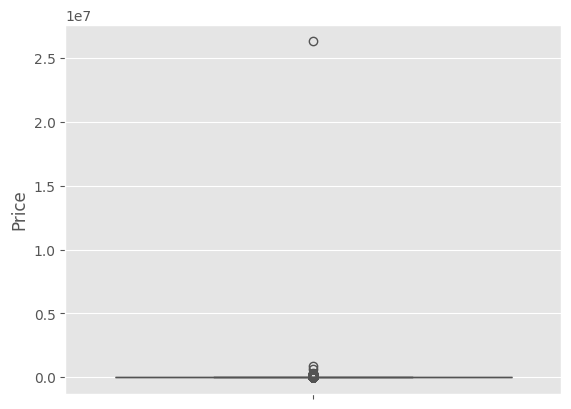

In [59]:
boxplot(df['Price'])
show()

#### **Observations from the Plot**

- ##### **Median**: The median price is relatively low, located towards the bottom of the box. This indicates that half of the prices are below this value.

- ##### **Spread**: The box is relatively short, suggesting that the middle 50% of the data has a small range. This means that a majority of the prices are clustered together.

- ##### **Skewness**: The plot is heavily skewed to the right.

- ##### The long whisker extending upwards shows that there's a wide range of higher prices.

- ##### Most of the data is compressed in the lower part of the distribution.

- ##### **Outliers**: There are several data points plotted as circles above the upper whisker. These are outliers, representing prices that are significantly higher than the majority of the data.

#### **Interpretation**

- ##### Most prices are low.

- ##### The majority of the prices are clustered within a small range.

- ##### There are a few very high-priced items that are significantly different from the rest of the data.

- ##### The distribution of prices is not symmetrical but is skewed towards higher values.

In [60]:
df[df['Price']> 5e5]

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Wheel,Color,Airbags
1225,627220,906.299205,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,Yes,Petrol,6.3,0,8,Tiptronic,4x4,Left wheel,Black,12
8541,872946,2067.000000,LAMBORGHINI,Urus,2019,Universal,Yes,Petrol,4.0,2531,8,Tiptronic,4x4,Left wheel,Black,0
16983,26307500,906.299205,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999,4,Manual,Front,Left wheel,Blue,0


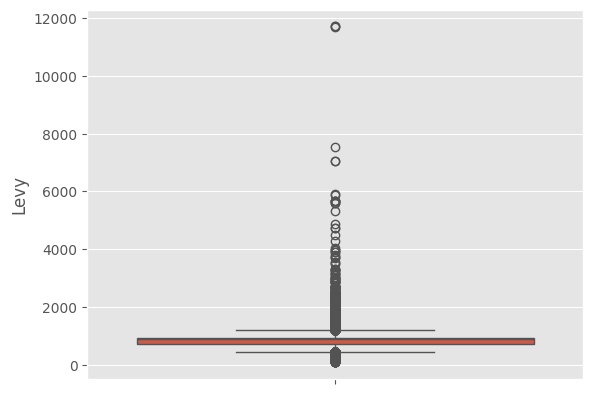

In [61]:
boxplot(df['Levy'])
show()

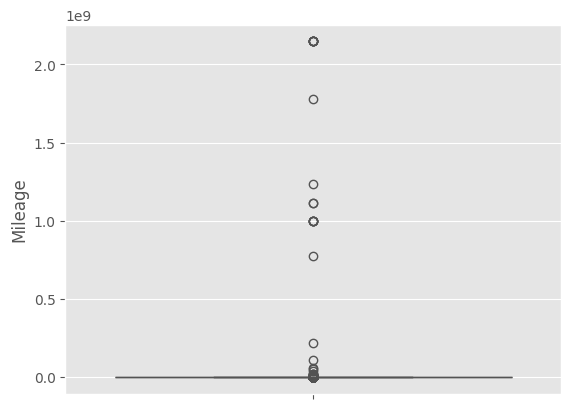

In [62]:
boxplot(df['Mileage'])
show()

In [63]:
numerical_data=df[['Price','Levy','Engine_volume','Mileage','Cylinders','Airbags']]
for column in numerical_data.columns:
    Q1=numerical_data[column].quantile(0.25)
    Q3=numerical_data[column].quantile(0.75)
    IQR = Q3-Q1

    Lower_bound = Q1 - 1.5*IQR
    Upper_bound = Q3 + 1.5*IQR

    outliers = ((numerical_data[column]>Upper_bound)|(numerical_data[column]<Lower_bound)).sum()
    Total = numerical_data[column].shape[0]
    print(f'Total of outliers in {column} are   :   {outliers}--{round(100*(outliers)/Total,2)}%')
        
    if outliers > 0:
        df=df.loc[(df[column] <= Upper_bound) & (df[column] >= Lower_bound)]

Total of outliers in Price are   :   1055--5.57%
Total of outliers in Levy are   :   3103--16.4%
Total of outliers in Engine_volume are   :   1358--7.18%
Total of outliers in Mileage are   :   635--3.36%
Total of outliers in Cylinders are   :   4765--25.18%
Total of outliers in Airbags are   :   0--0.0%


- ##### Cylinders has the highest percentage of outliers (25.18%), with a total of 4765 outliers.

- ##### Levy also has a substantial number of outliers (3103), representing 16.4% of its data.

- ##### Engine_volume and Price have a moderate number of outliers, 1358 (7.18%) and 1055 (5.57%) respectively.

- ##### Mileage has a relatively small percentage of outliers (635, 3.36%).

- ##### Airbags has no outliers (0%).

#### In essence, "Cylinders" and "Levy" contain the most outliers, suggesting that these variables have values that frequently deviate significantly from the norm

In [64]:
# def outliers(df, col):
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3-Q1

#     lower_bound= Q1-1.5 * IQR
#     upper_bound= Q1+1.5 * IQR

#     df_no_outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
#     return df_no_outliers

# df= outliers(df,'Price')
# df= outliers(df,'Mileage')
# df= outliers(df,'Levy')
# df= outliers(df,'Engine_volume')
# df= outliers(df,'Cylinders')
# df= outliers(df,'Airbags')

In [65]:
df.shape

(11520, 16)

C:\Users\RPC\AppData\Local\Temp\ipykernel_12912\4101698197.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['Price'])


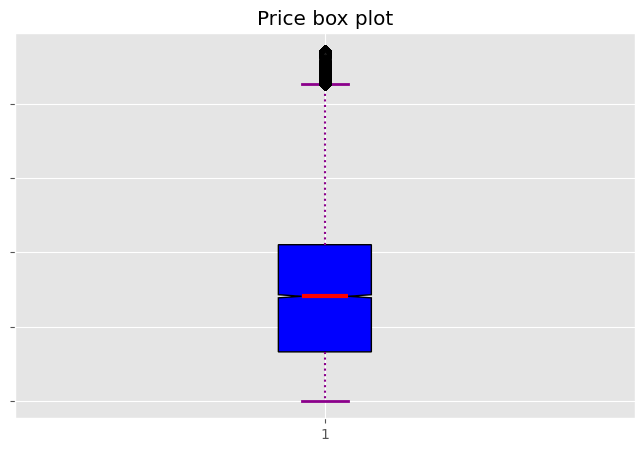

In [67]:
# Creating dataset
data = df['Price']

fig = figure(figsize =(8, 5))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)

colors = ['#0000FF']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
    
# x-axis labels
ax.set_yticklabels(['Price'])

# Adding title 
title("Price box plot")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
    
# show plot
show()

- ##### **Median**: The median price is relatively low, located towards the bottom of the box. This indicates that half of the prices are below this value.

- ##### **Spread**: The box is relatively short, suggesting that the middle 50% of the data has a small range. This means that a majority of the prices are clustered together.

- ##### **Skewness**: The plot is heavily skewed to the right.

- ##### The long whisker extending upwards shows that there's a wide range of higher prices.

- ##### Most of the data is compressed in the lower part of the distribution.

- ##### **Outliers**: There are several data points plotted as circles above the upper whisker. These are outliers, representing prices that are significantly higher than the majority of the data.

#### **Interpretation**

- ##### Most prices are low.

- ##### The majority of the prices are clustered within a small range.

- ##### There are a few very high-priced items that are significantly different from the rest of the data.

- ##### The distribution of prices is not symmetrical but is skewed towards higher values.

---------------------------------

#### Target Variable Analysis
#### Relationship with Predictors (scatter plots, box Plots against the target)

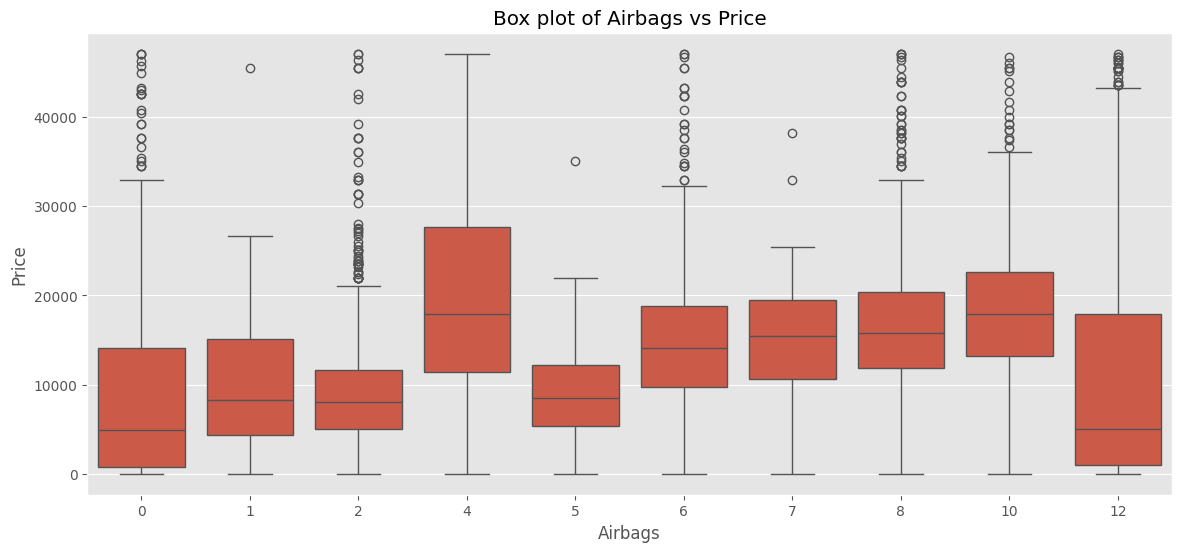

In [ ]:
top_10_categs = df['Airbags'].value_counts().index[:10]
filtered_df = df[df['Airbags'].isin(top_10_categs)]

figure(figsize=(14,6))
boxplot(x=filtered_df['Airbags'], y=filtered_df['Price'])
title(f'Box plot of Airbags vs Price')
show()

#### **Observations**:

- ##### **General Trend**: There appears to be a general, albeit not perfectly linear, positive relationship between the number of airbags and the median price. As the number of airbags increases, the median price tends to increase.

- ##### **Variability in Price**: For most airbag counts, there's a significant spread in price, as indicated by the height of the boxes and the length of the whiskers. This means that for a given number of airbags, there's a wide range of prices.

- ##### **Outliers**: Many of the airbag categories show a considerable number of outliers, particularly on the higher end of the price spectrum. This suggests that there are vehicles with a certain number of airbags that are priced significantly higher than the typical range for that category.

#### **Specific Airbag Counts**:

- ##### **0 Airbags**: Shows a relatively low median price and a wide spread.

- ##### **1, 2, 5 Airbags**: These categories seem to have lower median prices compared to their neighbors.

- ##### **4 Airbags**: This category stands out with a notably higher median price and a larger interquartile range (taller box) compared to 0, 1, 2, or 5 airbags.

- ##### **6, 7, 8, 10 Airbags**: These categories generally show increasing median prices. The median for 10 airbags appears to be one of the highest.

- ##### **12 Airbags**: This category has a relatively high median price, but also a particularly wide spread, with some very low prices and many high outliers.

**Relationship with Target (Price)**:

- ##### **Positive Association**: There is a discernible positive association between the number of airbags and the price. Vehicles with more airbags tend to have higher median prices. This makes intuitive sense, as more safety features often correlate with higher vehicle segments or newer models.

- ##### **Not a Perfect Predictor**: While there's a trend, the significant overlap in price ranges across different airbag counts, and the presence of many outliers, indicate that the number of airbags alone is not a strong, singular predictor of price. Other factors clearly play a substantial role.

- ##### **Potential for Feature Engineering**: This relationship suggests that 'Airbags' is a relevant feature for predicting 'Price'. Further analysis, or perhaps combining 'Airbags' with other features, could yield stronger predictive power.

-------------------------------

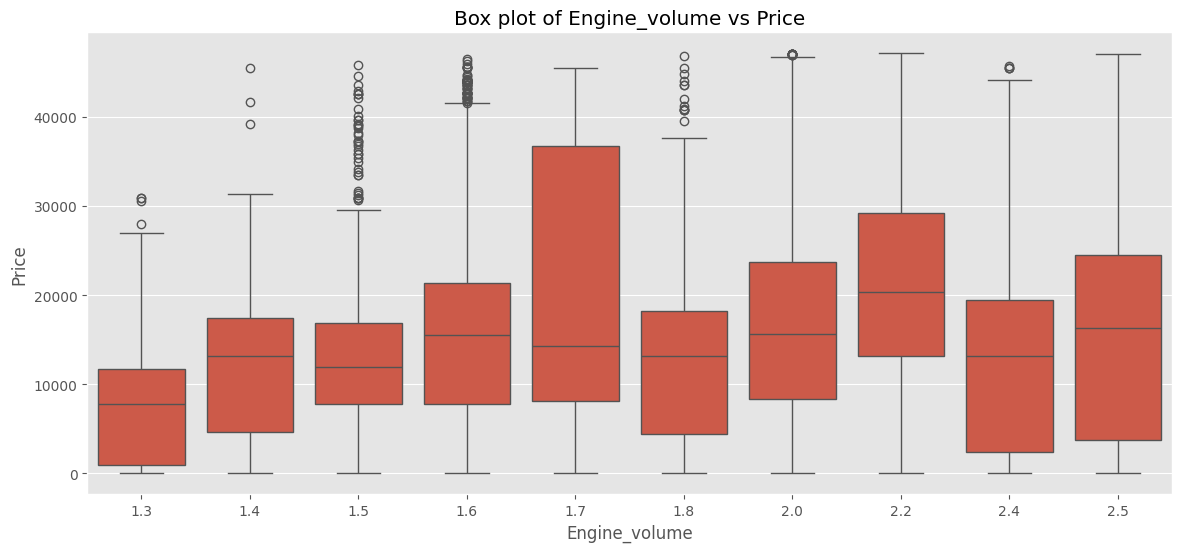

In [ ]:
top_10_categs = df['Engine_volume'].value_counts().index[:10]
filtered_df = df[df['Engine_volume'].isin(top_10_categs)]

figure(figsize=(14,6))
boxplot(x=filtered_df['Engine_volume'], y=filtered_df['Price'])
title(f'Box plot of Engine_volume vs Price')
show()

#### **Observations**:

- ##### **General Trend**: There appears to be a general positive relationship between engine volume and the median price. As the engine volume increases, the median price tends to increase, although this trend is not perfectly linear and has some fluctuations.

- ##### **Variability in Price**: For most engine volumes, there's a significant spread in price, as indicated by the height of the boxes and the length of the whiskers. This means that for a given engine volume, there's a wide range of prices.

- ##### **Outliers**: Many of the engine volume categories show a considerable number of outliers, particularly on the higher end of the price spectrum. This suggests that there are vehicles with a certain engine volume that are priced significantly higher than the typical range for that category.

#### **Specific Engine Volumes**:

- ##### **1.3 and 1.4**: These tend to have lower median prices and a narrower interquartile range.

- ##### **1.6**: Shows a higher median price and a wider spread compared to 1.3-1.5.

- ##### **1.7**: This category stands out with a very wide interquartile range (tallest box) and a relatively high median price, indicating a large variability in price for this engine size.

- ##### **1.8, 2.0, 2.2, 2.4, 2.5**: Generally show increasing median prices as engine volume increases, with 2.2 and 2.5 having some of the highest median prices.

#### **Relationship with Target (Price)**:

- ##### **Positive Association**: There is a discernible positive association between engine volume and price. Vehicles with larger engine volumes tend to have higher median prices. This is often expected, as larger engines are typically found in more expensive or higher-performance vehicles.

- ##### **Not a Perfect Predictor**: While there's a trend, the significant overlap in price ranges across different engine volumes, and the presence of many outliers, indicate that engine volume alone is not a strong, singular predictor of price. Other factors clearly play a substantial role.

- ##### **Potential for Feature Engineering**: This relationship suggests that 'Engine_volume' is a relevant feature for predicting 'Price'. Further analysis, or perhaps combining 'Engine_volume' with other features, could yield stronger predictive power.

------------------------------
------------------------------

## **Feature Extraction**

In [ ]:
# Date
dtime=datetime.now()
# calcul age of cars
df['Age_of_Car']=dtime.year-df['Prod_year']

In [ ]:
# df = df.drop(columns=['Prod_year'], axis=1)

In [ ]:
df[['Age_of_Car','Prod_year']]

,Age_of_Car,Prod_year
2,19,2006
3,14,2011
5,9,2016
6,15,2010
7,12,2013
...,...,...
19230,14,2011
19232,26,1999
19233,14,2011
19234,15,2010


------------------------------
------------------------------

## **Transform Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11520 entries, 2 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             11520 non-null  int64  
 1   Levy              11520 non-null  float64
 2   Manufacturer      11520 non-null  object 
 3   Model             11520 non-null  object 
 4   Prod_year         11520 non-null  int64  
 5   Category          11520 non-null  object 
 6   Leather_interior  11520 non-null  object 
 7   Fuel_type         11520 non-null  object 
 8   Engine_volume     11520 non-null  float64
 9   Mileage           11520 non-null  int64  
 10  Cylinders         11520 non-null  int64  
 11  Gear_box_type     11520 non-null  object 
 12  Drive_wheels      11520 non-null  object 
 13  Wheel             11520 non-null  object 
 14  Color             11520 non-null  object 
 15  Airbags           11520 non-null  int64  
 16  Age_of_Car        11520 non-null  int64  
dty

In [ ]:
# Spliting data to object data and non object data
df_object = df.select_dtypes('object')
df_non_object = df.select_dtypes('number')

In [ ]:
def number_unique_columns(data):
    for i in data.columns:
        print(f'{i} : {data[i].nunique()}')

In [ ]:
number_unique_columns(df_object)

Manufacturer : 55
Model : 953
Category : 11
Leather_interior : 2
Fuel_type : 6
Gear_box_type : 4
Drive_wheels : 3
Wheel : 2
Color : 16


------------------------

In [ ]:
# for label encoding

df_object_for_LB = df_object[['Manufacturer','Model','Category','Fuel_type','Color','Leather_interior','Wheel']]

LabelEncoders = {}
for col in df_object_for_LB:
    label = LabelEncoder()
    df_object_for_LB[col]=label.fit_transform(df_object_for_LB[col])
    LabelEncoders[col] = label

C:\Users\RPC\AppData\Local\Temp\ipykernel_6268\4043312042.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_object_for_LB[col]=label.fit_transform(df_object_for_LB[col])
C:\Users\RPC\AppData\Local\Temp\ipykernel_6268\4043312042.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_object_for_LB[col]=label.fit_transform(df_object_for_LB[col])
C:\Users\RPC\AppData\Local\Temp\ipykernel_6268\4043312042.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [ ]:
LabelEncoders

{'Manufacturer': LabelEncoder(),
 'Model': LabelEncoder(),
 'Category': LabelEncoder(),
 'Fuel_type': LabelEncoder(),
 'Color': LabelEncoder(),
 'Leather_interior': LabelEncoder(),
 'Wheel': LabelEncoder()}

In [ ]:
# mapping
mapping = {category : index for index, category in enumerate(LabelEncoders['Category'].classes_)}
print(mapping)

{'Cabriolet': 0, 'Coupe': 1, 'Goods wagon': 2, 'Hatchback': 3, 'Jeep': 4, 'Limousine': 5, 'Microbus': 6, 'Minivan': 7, 'Pickup': 8, 'Sedan': 9, 'Universal': 10}


In [ ]:
# # Save Label encoder for using
# with open('label_encoders.pkl','wb') as f :
#     dump(LabelEncoders, f)

--------------------------

In [ ]:
# for one hot encoding

categorical_cols = df_object[['Gear_box_type', 'Drive_wheels']].columns

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
one_hot_encoded = ohe.fit_transform(df_object[categorical_cols])
one_hot_columns = ohe.get_feature_names_out(categorical_cols)
df_ohe = DataFrame(one_hot_encoded, columns=one_hot_columns, index=df.index)
df_for_ohe = df_object.drop(columns=categorical_cols).join(df_ohe)

df_for_ohe = df_for_ohe.drop(['Manufacturer','Model','Category','Fuel_type','Color','Leather_interior', 'Wheel'],axis=1)

In [ ]:
df_for_ohe.head()

,Gear_box_type_Automatic,Gear_box_type_Manual,Gear_box_type_Tiptronic,Gear_box_type_Variator,Drive_wheels_4x4,Drive_wheels_Front,Drive_wheels_Rear
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_for_ohe.shape

(11520, 7)

In [ ]:
# # save one hot encoder

# with open('One_Hot_Encoder.pkl', 'wb') as f:
#     dump(ohe,f)

-----------------------------

In [ ]:
df = concat([df_non_object, df_object_for_LB, df_for_ohe],axis=1)

In [ ]:
df.head()

,Price,Levy,Prod_year,Engine_volume,Mileage,Cylinders,Airbags,Age_of_Car,Manufacturer,Model,...,Color,Leather_interior,Wheel,Gear_box_type_Automatic,Gear_box_type_Manual,Gear_box_type_Tiptronic,Gear_box_type_Variator,Drive_wheels_4x4,Drive_wheels_Front,Drive_wheels_Rear
2,8467,906.299205,2006,1.3,200000,4,2,19,17,412,...,1,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3607,862.000000,2011,2.5,168966,4,0,14,13,397,...,14,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,39493,891.000000,2016,2.0,160931,4,4,9,18,761,...,14,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1803,761.000000,2010,1.8,258909,4,12,15,48,694,...,14,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,549,751.000000,2013,2.4,216118,4,12,12,18,782,...,7,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df.shape

(11520, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11520 entries, 2 to 19236
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    11520 non-null  int64  
 1   Levy                     11520 non-null  float64
 2   Prod_year                11520 non-null  int64  
 3   Engine_volume            11520 non-null  float64
 4   Mileage                  11520 non-null  int64  
 5   Cylinders                11520 non-null  int64  
 6   Airbags                  11520 non-null  int64  
 7   Age_of_Car               11520 non-null  int64  
 8   Manufacturer             11520 non-null  int32  
 9   Model                    11520 non-null  int32  
 10  Category                 11520 non-null  int32  
 11  Fuel_type                11520 non-null  int32  
 12  Color                    11520 non-null  int32  
 13  Leather_interior         11520 non-null  int32  
 14  Wheel                    11

------------------------------
------------------------------

# **Model**

--------------------------

## **Spliting Data**

In [ ]:
x = df.drop('Price',axis=1)
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=1234)

In [ ]:
print(f'x_train : {x_train.shape}')
print(f'x_test : {x_test.shape}')
print('--------------------------')
print(f'y_train : {y_train.shape}')
print(f'y_test : {y_test.shape}')

x_train : (9792, 21)
x_test : (1728, 21)
--------------------------
y_train : (9792,)
y_test : (1728,)


In [ ]:
x_train.columns

Index(['Levy', 'Prod_year', 'Engine_volume', 'Mileage', 'Cylinders', 'Airbags',
       'Age_of_Car', 'Manufacturer', 'Model', 'Category', 'Fuel_type', 'Color',
       'Leather_interior', 'Wheel', 'Gear_box_type_Automatic',
       'Gear_box_type_Manual', 'Gear_box_type_Tiptronic',
       'Gear_box_type_Variator', 'Drive_wheels_4x4', 'Drive_wheels_Front',
       'Drive_wheels_Rear'],
      dtype='object')

------------------------------

## **Standard Scaling**

In [ ]:
scaler = StandardScaler()

x_train[['Levy','Engine_volume','Mileage','Age_of_Car']] = scaler.fit_transform(x_train[['Levy','Engine_volume','Mileage','Age_of_Car']])
x_test[['Levy','Engine_volume','Mileage','Age_of_Car']] = scaler.fit_transform(x_test[['Levy','Engine_volume','Mileage','Age_of_Car']])

In [ ]:
# # saving scaling 
# with open('scaler.pkl' , 'wb') as file :
#     dump(scaler, file)

-------------------------------

## **Creating Model**

In [ ]:
r_2=[]
rmse=[]
mae=[]

def reg(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)

    R2 = r2_score(y_test,pred)
    RMSE = sqrt(mean_squared_error(y_test,pred))
    MAE = mean_absolute_error(y_test,pred)
    
    r_2.append(R2)
    rmse.append(RMSE)
    mae.append(MAE)

In [ ]:
XGBRegressor_model = XGBRegressor()
RandomForestRegressor_model = RandomForestRegressor()
DecisionTreeRegressor_model = DecisionTreeRegressor()
GradientBoostingRegressor_model = GradientBoostingRegressor()

In [ ]:
reg(XGBRegressor_model)
reg(RandomForestRegressor_model)
reg(DecisionTreeRegressor_model)
reg(GradientBoostingRegressor_model)

In [ ]:
Algorithms = ['RandomForestRegressor','XGBRegressor','DecisionTreeRegressor','GradientBoostingRegressor']

In [ ]:
result=DataFrame({'Algorithms':Algorithms,'R2':r_2,'rmse':rmse,'mae':mae})
result

,Algorithms,R2,rmse,mae
0,RandomForestRegressor,0.780724,5288.389925,3628.887207
1,XGBRegressor,0.809248,4932.451728,3203.261752
2,DecisionTreeRegressor,0.620554,6956.692342,4194.283943
3,GradientBoostingRegressor,0.709763,6084.208815,4422.189539


#### This table presents the performance evaluation of four different regression algorithms on a given dataset. The algorithms are:

- ##### **RandomForestRegressor**
- ##### **XGBRegressor**
- ##### **DecisionTreeRegressor**
- ##### **GradientBoostingRegressor**

### **Comparison of Algorithms:**

- #### **XGBRegressor** shows the best performance across all three metrics:
- ##### It has the highest R2 value (0.8092), indicating that it explains the largest proportion of the variance in the target variable.
- ##### It has the lowest rmse (4932.45) and mae (3203.26), indicating the smallest average errors in its predictions.
- #### **RandomForestRegressor** performs the second best, with a good R2 value (0.7807) and relatively low error metrics.
- #### **GradientBoostingRegressor** comes in third, with a decent R2 (0.7098) but higher error metrics than RandomForestRegressor and XGBRegressor.
- #### **DecisionTreeRegressor** has the weakest performance among the four:
- ##### It has the lowest R2 value (0.6206), suggesting it explains the least amount of variance.
- ##### It has the highest rmse (6956.69) and mae (4194.28), indicating the largest average errors.

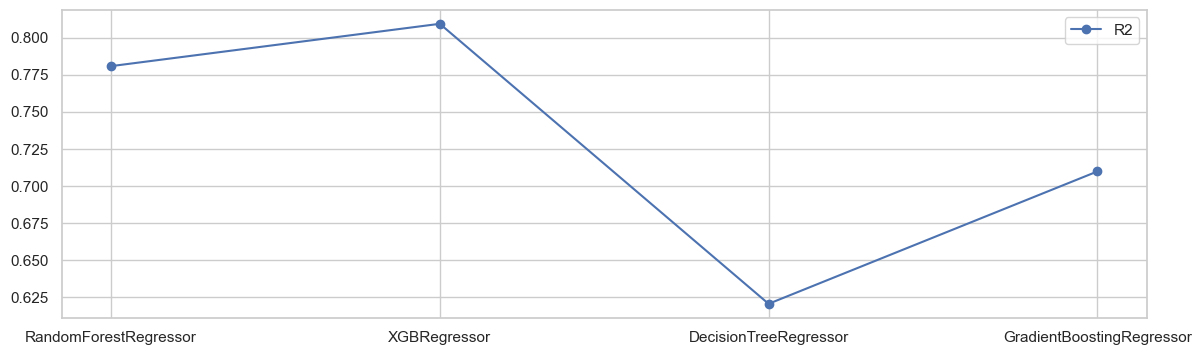

In [ ]:
fig,sx = subplots(figsize=(14,4))
plot(result.Algorithms,result.R2,label='R2',c='b',marker='o')
legend()
show()

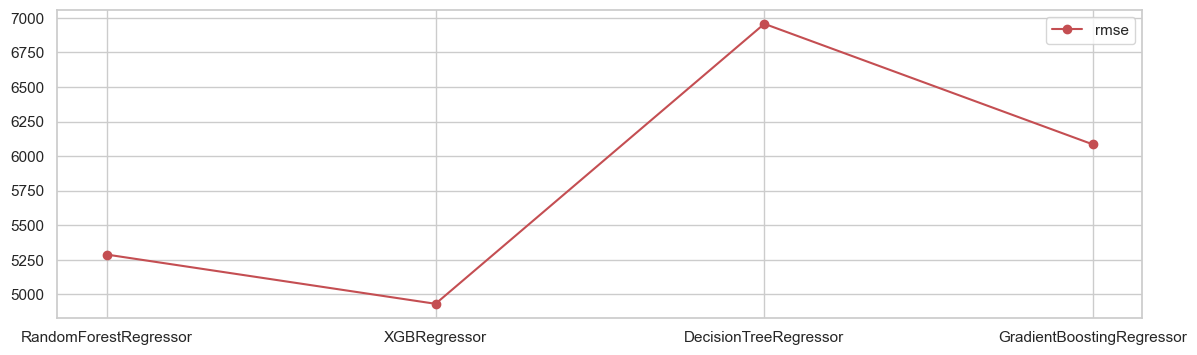

In [ ]:
fig,sx = subplots(figsize=(14,4))
plot(result.Algorithms,result.rmse,label='rmse',c='r',marker='o')
legend()
show()

In [ ]:
# # saving model
# with open('XGBRegressor_model.pkl' , 'wb') as file3 :
#     dump(XGBRegressor_model, file3)

In [ ]:
# # saving model
# with open('RandomForestRegressor_model.pkl' , 'wb') as file3 :
#     dump(RandomForestRegressor_model, file3)

In [ ]:
# !jupyter nbconvert --to html "Car_Price_prediction.ipynb"

# <center><strong>Conclusion</strong></center>
##### **Based on these metrics, the XGBRegressor is the best-performing algorithm for this specific regression task. It provides the most accurate predictions with the least amount of error and explains the most variance in the target variable. The DecisionTreeRegressor appears to be the least suitable model among the four.**